# James Cooper
# Assignment 3
# CSC 478-710

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
import os
os.chdir('C:\Users\James Cooper\Desktop\DePaul\Programming Machine Learning\Assignment3')

### 1. Linear Regression
For this problem you will experiment with linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.

#### a. Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [3]:
communities = pd.read_csv('communities.csv')
communities.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [4]:
communities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
state                    1994 non-null int64
communityname            1994 non-null object
population               1994 non-null float64
householdsize            1994 non-null float64
racepctblack             1994 non-null float64
racePctWhite             1994 non-null float64
racePctAsian             1994 non-null float64
racePctHisp              1994 non-null float64
agePct12t21              1994 non-null float64
agePct12t29              1994 non-null float64
agePct16t24              1994 non-null float64
agePct65up               1994 non-null float64
numbUrban                1994 non-null float64
pctUrban                 1994 non-null float64
medIncome                1994 non-null float64
pctWWage                 1994 non-null float64
pctWFarmSelf             1994 non-null float64
pctWInvInc               1994 non-null float64
pctWSocSec               1994 non-null float64
pc

In [141]:
communities.columns

Index([u'population', u'householdsize', u'racepctblack', u'racePctWhite',
       u'racePctAsian', u'racePctHisp', u'agePct12t21', u'agePct12t29',
       u'agePct16t24', u'agePct65up', u'numbUrban', u'pctUrban', u'medIncome',
       u'pctWWage', u'pctWFarmSelf', u'pctWInvInc', u'pctWSocSec',
       u'pctWPubAsst', u'pctWRetire', u'medFamInc', u'perCapInc',
       u'whitePerCap', u'blackPerCap', u'indianPerCap', u'AsianPerCap',
       u'OtherPerCap', u'HispPerCap', u'NumUnderPov', u'PctPopUnderPov',
       u'PctLess9thGrade', u'PctNotHSGrad', u'PctBSorMore', u'PctUnemployed',
       u'PctEmploy', u'PctEmplManu', u'PctEmplProfServ', u'MalePctDivorce',
       u'MalePctNevMarr', u'FemalePctDiv', u'TotalPctDiv', u'PersPerFam',
       u'PctFam2Par', u'PctKids2Par', u'PctYoungKids2Par', u'PctTeen2Par',
       u'PctWorkMomYoungKids', u'PctWorkMom', u'NumIlleg', u'PctIlleg',
       u'NumImmig', u'PctImmigRecent', u'PctImmigRec5', u'PctImmigRec8',
       u'PctImmigRec10', u'PctRecentImmig', u'Pct

In [5]:
communities.describe()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000
max,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### b. Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you may use the KFold module from sklearn.cross_validation).

In [6]:
y = communities['ViolentCrimesPerPop']
y.head()

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [7]:
communities = communities.drop('state', axis=1)
communities = communities.drop('communityname', axis=1)
communities = communities.drop('ViolentCrimesPerPop', axis=1)

In [8]:
communities.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [9]:
#First function opens text file and assumes the last column value is the target variable
#Second function computes best fit line - load in x and y arrays (dataMat and labelMat)

def loadDataSet(filename):
    numFeat = len(open(filename).readline().split('\t')) - 1
    dataMat = []; labelMat = []
    fr = open(filename)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

def standRegres(xArr, yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print "this matrix is singular, cannot do inverse"
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [36]:
xArr, yArr = loadDataSet('communities.txt')

In [33]:
xArr[0:3]

[[1.0,
  0.19,
  0.33,
  0.02,
  0.9,
  0.12,
  0.17,
  0.34,
  0.47,
  0.29,
  0.32,
  0.2,
  1.0,
  0.37,
  0.72,
  0.34,
  0.6,
  0.29,
  0.15,
  0.43,
  0.39,
  0.4,
  0.39,
  0.32,
  0.27,
  0.27,
  0.36,
  0.41,
  0.08,
  0.19,
  0.1,
  0.18,
  0.48,
  0.27,
  0.68,
  0.23,
  0.41,
  0.68,
  0.4,
  0.75,
  0.75,
  0.35,
  0.55,
  0.59,
  0.61,
  0.56,
  0.74,
  0.76,
  0.04,
  0.14,
  0.03,
  0.24,
  0.27,
  0.37,
  0.39,
  0.07,
  0.07,
  0.08,
  0.08,
  0.89,
  0.06,
  0.14,
  0.13,
  0.33,
  0.39,
  0.28,
  0.55,
  0.09,
  0.51,
  0.5,
  0.21,
  0.71,
  0.52,
  0.05,
  0.26,
  0.65,
  0.14,
  0.06,
  0.22,
  0.19,
  0.18,
  0.36,
  0.35,
  0.38,
  0.34,
  0.38,
  0.46,
  0.25,
  0.04,
  0.0,
  0.12,
  0.42,
  0.5,
  0.51,
  0.64,
  0.12,
  0.26,
  0.2],
 [1.0,
  0.0,
  0.16,
  0.12,
  0.74,
  0.45,
  0.07,
  0.26,
  0.59,
  0.35,
  0.27,
  0.02,
  1.0,
  0.31,
  0.72,
  0.11,
  0.45,
  0.25,
  0.29,
  0.39,
  0.29,
  0.37,
  0.38,
  0.33,
  0.16,
  0.3,
  0.22,
  0.35,
  0.01,

In [45]:
yArr[0:10]

[0.2, 0.67, 0.43, 0.12, 0.03, 0.14, 0.03, 0.55, 0.53, 0.15]

In [38]:
ws = standRegres(xArr, yArr)
print ws.T

[[  5.87927902e-01   1.30357010e-01  -3.13254345e-02   2.09860763e-01
   -4.07310584e-02  -1.39523179e-02   5.92732993e-02   1.22906865e-01
   -2.22748545e-01  -1.46917838e-01   5.04827629e-02  -2.41341327e-01
    4.63571528e-02  -1.97074451e-01  -2.06188472e-01   4.66564436e-02
   -1.77298586e-01   6.27109822e-02   1.15093614e-02  -9.08598353e-02
    2.74636307e-01   1.02213847e-01  -3.31881713e-01  -2.93036978e-02
   -3.54803633e-02   2.27091429e-02   4.49559060e-02   3.38239655e-02
    1.28026535e-01  -1.91005530e-01  -1.00578050e-01   6.43991119e-02
    1.06198242e-01   1.15540984e-04   2.34956098e-01  -3.75921013e-02
   -7.72964276e-03   4.67397466e-01   2.26383541e-01   1.74974353e-01
   -5.76057921e-01  -1.41873981e-01   5.68353640e-02  -3.50847249e-01
   -3.51508016e-02   4.00630448e-04   5.57184984e-02  -1.82306601e-01
   -1.54580191e-01   1.26224165e-01  -1.44152877e-01   2.37424185e-02
    3.37856924e-02  -7.44269643e-02   3.56790540e-02  -3.26845278e-02
   -2.19499422e-01  

In [40]:
ws.shape

(98L, 1L)

In [73]:
Xmatrix = np.mat(xArr)
ymatrix = np.mat(yArr)

In [75]:
ymatrix.shape

(1L, 1994L)

In [83]:
y = ymatrix.T
ydf = pd.DataFrame(y)
ydf.to_csv('yvals1.csv')

In [84]:
y.shape

(1994L, 1L)

In [78]:
yhat = Xmatrix*ws

In [79]:
yhat.shape

(1994L, 1L)

In [61]:
yhatdf = pd.DataFrame(yhat)
yhatdf.to_csv('yhat.csv')

In [89]:
errorvec = abs(yhat - y)
errorvec.shape

(1994L, 1L)

In [90]:
print errorvec[:10]

[[ 0.03430674]
 [ 0.37956669]
 [ 0.046338  ]
 [ 0.2026074 ]
 [ 0.05089853]
 [ 0.0901293 ]
 [ 0.05794889]
 [ 0.10743409]
 [ 0.29233552]
 [ 0.1452652 ]]


In [100]:
#dot product of error vector with itself gives sum of squared errors
errMat = np.mat(errorvec)
total_err = np.dot(errMat.T, errMat)
total_err

matrix([[ 33.1170776]])

In [121]:
#compute RMSE
rmse_train = np.sqrt(total_err/len(y))
print rmse_train

[[ 0.12887344]]


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [122]:
#Using sklearn
linreg = LinearRegression()

In [124]:
linreg.fit(xArr, yArr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [128]:
print linreg.predict(xArr[:10])

[ 0.16569326  0.29043331  0.383662    0.3226074  -0.02089853  0.2301293
  0.08794889  0.44256591  0.23766448  0.0047348 ]


In [131]:
p = linreg.predict(xArr)
err = abs(p - yArr)
print err[:10]

[ 0.03430674  0.37956669  0.046338    0.2026074   0.05089853  0.0901293
  0.05794889  0.10743409  0.29233552  0.1452652 ]


In [133]:
t_err = np.dot(err, err)
rmsesk_train = np.sqrt(t_err/len(p))
print rmsesk_train

0.128873441382


In [135]:
print 'Regression Coefficients: \n', linreg.coef_

Regression Coefficients: 
[ -1.48971705e-16   1.30357010e-01  -3.13254345e-02   2.09860763e-01
  -4.07310584e-02  -1.39523179e-02   5.92732993e-02   1.22906865e-01
  -2.22748545e-01  -1.46917838e-01   5.04827629e-02  -2.41341327e-01
   4.63571528e-02  -1.97074451e-01  -2.06188472e-01   4.66564436e-02
  -1.77298586e-01   6.27109822e-02   1.15093614e-02  -9.08598353e-02
   2.74636307e-01   1.02213847e-01  -3.31881713e-01  -2.93036978e-02
  -3.54803633e-02   2.27091429e-02   4.49559060e-02   3.38239655e-02
   1.28026535e-01  -1.91005530e-01  -1.00578050e-01   6.43991119e-02
   1.06198242e-01   1.15540984e-04   2.34956098e-01  -3.75921013e-02
  -7.72964276e-03   4.67397466e-01   2.26383541e-01   1.74974353e-01
  -5.76057921e-01  -1.41873981e-01   5.68353640e-02  -3.50847249e-01
  -3.51508016e-02   4.00630449e-04   5.57184984e-02  -1.82306601e-01
  -1.54580191e-01   1.26224165e-01  -1.44152877e-01   2.37424185e-02
   3.37856924e-02  -7.44269643e-02   3.56790540e-02  -3.26845278e-02
  -2.194

In [160]:
c = communities.columns.values.tolist()
labs = np.array(c)
labsT = labs.T

In [161]:
import pylab as pl

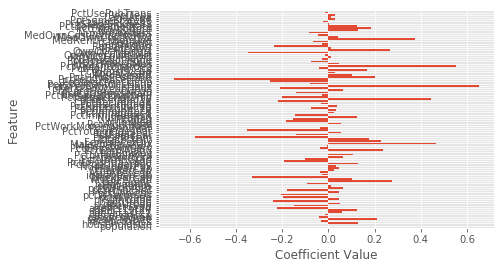

In [162]:
%matplotlib inline
def plot_coefficients(model, n_features, feature_names):
    pl.barh(range(n_features), model.coef_[:-1], align='center')
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel('Coefficient Value')
    pl.ylabel('Feature')
    pl.ylim(-1,n_features)

plot_coefficients(linreg, len(labsT), labsT)

#### Perform 10-fold cross validation

In [115]:
#from sklearn.cross_validation import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(xArr, yArr, test_size=0.2, random_state=1)
#np.shape(x_train)

(1595L, 98L)

In [164]:
from sklearn.cross_validation import KFold

In [169]:
x_sk = np.array(xArr)
x_sk

array([[ 1.  ,  0.19,  0.33, ...,  0.12,  0.26,  0.2 ],
       [ 1.  ,  0.  ,  0.16, ...,  0.02,  0.12,  0.45],
       [ 1.  ,  0.  ,  0.42, ...,  0.01,  0.21,  0.02],
       ..., 
       [ 1.  ,  0.16,  0.37, ...,  0.08,  0.32,  0.18],
       [ 1.  ,  0.08,  0.51, ...,  0.03,  0.38,  0.33],
       [ 1.  ,  0.2 ,  0.78, ...,  0.11,  0.3 ,  0.05]])

In [171]:
y_sk = np.array(yArr)
y_sk

array([ 0.2 ,  0.67,  0.43, ...,  0.23,  0.19,  0.48])

In [172]:
n = 10
kf = KFold(len(x_sk), n_folds=n)
xval_err = 0
for train, test in kf:
    linreg.fit(x_sk[train], y_sk[train])
    p = linreg.predict(x_sk[test])
    e = p - y_sk[test]
    xval_err += np.sqrt(np.dot(e,e)/len(x_sk[test]))

rmse_10cv = xval_err/n

In [174]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmsesk_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1289
RMSE on 10-fold CV: 0.1358


#### c. Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target attribute; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error'

In [85]:
from sklearn.cross_validation import KFold
from sklearn import feature_selection
from sklearn import cross_validation

In [61]:
communities_c = pd.read_csv('communities.csv')
communities_c.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [62]:
y_targ = communities_c['ViolentCrimesPerPop']
y_targ.head()

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [63]:
communities_c = communities_c.drop('state', axis=1)
communities_c = communities_c.drop('communityname', axis=1)
communities_c = communities_c.drop('ViolentCrimesPerPop', axis=1)
communities_c.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [64]:
communities_c.isnull().values.any()

False

In [10]:
communities_c.describe().T

,count,mean,std,min,25%,50%,75%,max
population,1994.0,0.057593,0.126906,0.0,0.0100,0.020,0.0500,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.3500,0.440,0.5400,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.0200,0.060,0.2300,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.6300,0.850,0.9400,1.0
racePctAsian,1994.0,0.153681,0.208877,0.0,0.0400,0.070,0.1700,1.0
racePctHisp,1994.0,0.144022,0.232492,0.0,0.0100,0.040,0.1600,1.0
agePct12t21,1994.0,0.424218,0.155196,0.0,0.3400,0.400,0.4700,1.0
agePct12t29,1994.0,0.493867,0.143564,0.0,0.4100,0.480,0.5400,1.0
agePct16t24,1994.0,0.336264,0.166505,0.0,0.2500,0.290,0.3600,1.0
agePct65up,1994.0,0.423164,0.179185,0.0,0.3000,0.420,0.5300,1.0


In [65]:
x_c = np.array([np.concatenate((v,[1])) for v in np.array(communities_c)])
y_c = np.array(y_targ).T

In [66]:
#set aside 20% of the data fro test - perform all cross validation on training portion
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size=0.2, random_state=1)
np.shape(x_train)

(1595L, 98L)

In [67]:
#find the top 30% of the features - essentially dimensionality reduction
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 30)
x_train_fs = fs.fit_transform(x_train, y_train)

In [68]:
np.set_printoptions(suppress=True, precision=2, linewidth=90)
print fs.get_support()
print fs.scores_

[ True False  True  True False False False False False False False False  True False False
  True False  True False  True False False False False False False False  True  True  True
  True False  True False False False  True False  True  True False  True  True  True  True
 False False  True  True False False False False False False False False False False False
  True False False False False  True  True  True False  True False  True  True False False
  True False False False False False False False False False False False  True False False
 False False False False False False False False]
[  251.05     2.2   1110.84  1472.12     2.36   150.47     4.93    35.68    15.14     9.6
   243.69     9.49   363.31   171.34    46.89   821.54    26.26   836.39    14.83   392.57
   227.49    70.57   131.17    15.66    35.1     24.53   103.86   393.46   633.65   344.97
   514.04   175.98   559.7    211.43     2.51     8.3    626.     161.96   739.86   723.22
    29.94  1651.16  1985.78  1299.54  131

In [69]:
print communities_c.columns[fs.get_support()]

Index([u'population', u'racepctblack', u'racePctWhite', u'medIncome',
       u'pctWInvInc', u'pctWPubAsst', u'medFamInc', u'NumUnderPov',
       u'PctPopUnderPov', u'PctLess9thGrade', u'PctNotHSGrad',
       u'PctUnemployed', u'MalePctDivorce', u'FemalePctDiv', u'TotalPctDiv',
       u'PctFam2Par', u'PctKids2Par', u'PctYoungKids2Par', u'PctTeen2Par',
       u'NumIlleg', u'PctIlleg', u'PctLargHouseFam', u'PctPersOwnOccup',
       u'PctPersDenseHous', u'PctHousLess3BR', u'HousVacant', u'PctHousOwnOcc',
       u'PctVacantBoarded', u'PctHousNoPhone', u'NumInShelters'],
      dtype='object')


In [70]:
for i in range(len(communities_c.columns.values)):
    if fs.get_support()[i]:
        print communities_c.columns.values[i],'\t', fs.scores_[i]

population 	251.045167497
racepctblack 	1110.84475803
racePctWhite 	1472.11922551
medIncome 	363.306736309
pctWInvInc 	821.542444356
pctWPubAsst 	836.386407689
medFamInc 	392.571949348
NumUnderPov 	393.464493978
PctPopUnderPov 	633.646295791
PctLess9thGrade 	344.968270252
PctNotHSGrad 	514.036659027
PctUnemployed 	559.697219097
MalePctDivorce 	625.999604421
FemalePctDiv 	739.857527677
TotalPctDiv 	723.217590696
PctFam2Par 	1651.16008571
PctKids2Par 	1985.78029165
PctYoungKids2Par 	1299.53889496
PctTeen2Par 	1310.44665979
NumIlleg 	442.87187055
PctIlleg 	1946.6082511
PctLargHouseFam 	285.609717076
PctPersOwnOccup 	613.06518451
PctPersDenseHous 	426.492853484
PctHousLess3BR 	493.297803172
HousVacant 	351.685508486
PctHousOwnOcc 	450.941471396
PctVacantBoarded 	533.733328756
PctHousNoPhone 	503.194684892
NumInShelters 	274.211489389


In [71]:
from sklearn.linear_model import LinearRegression

1 0.114308291957
6 0.101753172654
11 0.101932184637
16 0.101639512947
21 0.0997921356465
26 0.0978699776633
31 0.0973832348108
36 0.097673726383
41 0.0969681376715
46 0.0975567674783
51 0.0979171157941
56 0.0980114672749
61 0.0986374270204
66 0.0990573112351
71 0.0994165778075
76 0.0986363239022
81 0.0989358759745
86 0.0991042788208
91 0.0988817687011
96 0.0981098650175
Optimal percentile of features:[41] 

Optimal number of features:39 



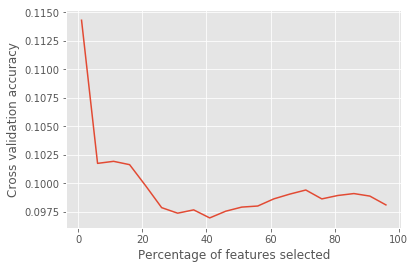

In [58]:
lr = LinearRegression()
percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    #score is an array, each element is a cv score (accuracy measure here for each fold)
    scores = (cross_validation.cross_val_score(lr, x_train_fs, y_train, cv=5, scoring = 'neg_mean_absolute_error'))
    #since we are using 5 folds for each cross validation, each time we get 5 accuracy scores, we need the mean
    print i, abs(scores.mean())
    #append the mean value to an array called results
    results = np.append(results, scores.mean())

#np.where will give the index of whatever condition you specify - here we want the max result
optimal_percentile = np.where(results == results.max())[0]
percentiles1 = np.array(percentiles)
print "Optimal percentile of features:{0}".format(percentiles1[optimal_percentile]), "\n"
optimal_num_features = int(percentiles1[optimal_percentile]*len(communities_c.columns)/100)
print "Optimal number of features:{0}".format(optimal_num_features), "\n"

import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles1,abs(results))

In [72]:
from sklearn.metrics import mean_squared_error

In [81]:
#mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
#>>> from sklearn.metrics import mean_squared_error
#>>> y_true = [3, -0.5, 2, 7]
#>>> y_pred = [2.5, 0.0, 2, 8]
#>>> mean_squared_error(y_true, y_pred)
lr = LinearRegression()
#SelectKbest instead of percentile, and now we can use the optimal features we found
#we need to build a linear regression and fit the data, precict the y values and compare them to the actual using mean_squared_error
fs = feature_selection.SelectKBest(feature_selection.f_regression, optimal_num_features)
x_train_fs = fs.fit_transform(x_train, y_train)
lr.fit(x_train_fs, y_train)
x_test_fs = fs.transform(x_test)
s = lr.predict(x_test_fs)
mean_squared_error(y_test, s)

0.020727172210450735

#### d. Next, perform Ridge Regression and Lasso Regression, however this time use the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. You should create a function that takes as input the data and target attribute; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [83]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, SGDRegressor

In [86]:
#set aside 20% of the data fro test - perform all cross validation on training portion
#from sklearn.cross_validation import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size=0.2, random_state=1)

ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(x_c, y_c)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [92]:
p = ridge.predict(x_c)
err = p-y_c
total_error = np.dot(err, err)
rmse_train = np.sqrt(total_error/len(p))

n = 5
kf = KFold(len(x_c), n_folds=n)
xval_err = 0
for train, test in kf:
    ridge.fit(x_c[train], y_c[train])
    p = ridge.predict(x_c[test])
    e = p-y_c[test]
    xval_err += np.sqrt(np.dot(e, e)/len(x_c[test]))
rmse_5cv = xval_err/n

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 5-fold CV: %.4f' %rmse_5cv)

Method: Ridge Regression
RMSE on training: 0.1301
RMSE on 5-fold CV: 0.1360


In [100]:
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_5cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(alpha=a)
    
    ridge.fit(x_c,y_c)
    p = ridge.predict(x_c)
    err = p-y_c
    total_error = np.dot(err, err)
    rmse_train = np.sqrt(total_error/len(p))
    
    n = 5
    kf = KFold(len(x_c), n_folds=n)
    xval_err = 0
    for train, test in kf:
        ridge.fit(x_c[train], y_c[train])
        p = ridge.predict(x_c[test])
        e = p-y_c[test]
        xval_err += np.sqrt(np.dot(e, e)/len(x_c[test]))
    rmse_5cv = xval_err/n

    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_5cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a, rmse_train, rmse_5cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_5cv

0.010	 0.1289		 0.1371
0.418	 0.1294		 0.1361
0.826	 0.1297		 0.1359
1.234	 0.1300		 0.1358
1.642	 0.1303		 0.1358
2.050	 0.1305		 0.1358
2.458	 0.1307		 0.1358
2.866	 0.1309		 0.1359
3.274	 0.1311		 0.1359
3.682	 0.1312		 0.1360
4.090	 0.1314		 0.1360
4.498	 0.1315		 0.1360
4.906	 0.1317		 0.1361
5.313	 0.1318		 0.1361
5.721	 0.1319		 0.1362
6.129	 0.1320		 0.1362
6.537	 0.1321		 0.1362
6.945	 0.1322		 0.1363
7.353	 0.1323		 0.1363
7.761	 0.1324		 0.1363
8.169	 0.1325		 0.1364
8.577	 0.1326		 0.1364
8.985	 0.1327		 0.1364
9.393	 0.1328		 0.1365
9.801	 0.1328		 0.1365
10.209	 0.1329		 0.1365
10.617	 0.1330		 0.1366
11.025	 0.1330		 0.1366
11.433	 0.1331		 0.1366
11.841	 0.1332		 0.1367
12.249	 0.1332		 0.1367
12.657	 0.1333		 0.1367
13.065	 0.1334		 0.1367
13.473	 0.1334		 0.1368
13.881	 0.1335		 0.1368
14.289	 0.1335		 0.1368
14.697	 0.1336		 0.1368
15.104	 0.1336		 0.1369
15.512	 0.1337		 0.1369
15.920	 0.1337		 0.1369
16.328	 0.1338		 0.

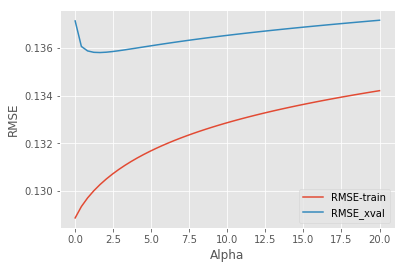

In [104]:
pl.plot(alpha, t_rmse, label ='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_xval')
pl.legend(('RMSE-train', 'RMSE_xval'))
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In [109]:
a = 0.3
for name, met in[
    ('lasso', Lasso(fit_intercept=True, alpha=a))
    ]:
    
    met.fit(x_c, y_c)
    p = met.predict(x_c)
    e = p-y_c
    total_error = np.dot(e, e)
    rmse_train = np.sqrt(total_error/len(p))
    
    kf = KFold(len(x_c), n_folds=5)
    err = 0
    for train, test in kf:
        met.fit(x_c[train], y_c[train])
        p = met.predict(x_c[test])
        e = p-y_c[test]
        err += np.dot(e,e)
    rmse_5cross = np.sqrt(err/len(x_c))
    
    print ('Lasso: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 5-fold CV: %.4f' %rmse_5cross)

Lasso: lasso
RMSE on training: 0.2329
RMSE on 5-fold CV: 0.2331


#### e. Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start with creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV

In [127]:
#set aside 20% of the data fro test - perform all cross validation on training portion
S = StandardScaler()
S.fit(x_c)
xnormalized = S.transform(x_c)
from sklearn.cross_validation import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(xnormalized, y_c, test_size=0.2, random_state=1)

In [131]:
sgd = SGDRegressor()
parameters = {
    'penalty': ['l1', 'l2'],
    'alpha': np.linspace(0.0001, 100, 100)}
gs = GridSearchCV(sgd, parameters, verbose=1, cv=5)

In [134]:
gs.fit(xnormalized, y_c)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    9.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'alpha': array([   0.0001,    1.0102, ...,   98.9899,  100.    ])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

### 2. Automatic Document Clustering [Dataset: newsgroups5.zip]
For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.

Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). You may also use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.

#### a. Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [135]:
from sklearn.cluster import KMeans

In [156]:
#D = the docxterm matrix
#x = instance we want to categorize

def Cosines(x, D):
    D_norm = np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
        #Divide the dot product of x and each instance in D by the product of the two norms
        #np.dot gives the dot product of two vectors divided by a comma
        #D = the docxterm matrix
        #x = instance we want to categorize
    sims = np.dot(D,x)/(D_norm * x_norm)
        #distance measure will be the inverse of cosine similarity
    dists = 1 - sims
    return sorted(dists)

#### b. Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [137]:
import os
os.chdir('C:\Users\James Cooper\Desktop\DePaul\Programming Machine Learning\Assignment3')

In [5]:
os.getcwd()

'C:\\Users\\James Cooper\\Desktop\\DePaul\\Programming Machine Learning\\Assignment3'

In [138]:
dataMatrix = pd.DataFrame(np.genfromtxt("matrix.txt", delimiter=',',dtype=int))
dataMatrix.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#9,328 terms x 2,500 documents
dataMatrix.shape

(9328, 2500)

In [139]:
#Final dataset
dataMatrixT = dataMatrix.T
dataMatrixT.head()

,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
#Doc x Term
#2500 documents x 9,328 terms
dataMatrixT.shape

(2500, 9328)

In [141]:
termset = pd.DataFrame(np.genfromtxt("terms.txt", delimiter='\t',dtype=str))
termset.head()

,0
0,aa
1,aargh
2,aaron
3,aaronc
4,ab


In [142]:
#Final termset
targterms = np.array(termset)
targterms[:5,:]

array([['aa'],
       ['aargh'],
       ['aaron'],
       ['aaronc'],
       ['ab']], dtype=object)

In [143]:
#Final Class set
classes = pd.DataFrame(np.genfromtxt("classes.txt", delimiter=' ',dtype=int,skip_header=1))
classes = classes.drop(0, axis=1)

In [144]:
classes.head()

,1
0,0
1,1
2,1
3,1
4,2


In [25]:
from sklearn.cross_validation import train_test_split

In [145]:
from sklearn.cross_validation import train_test_split
DT_train, DT_test, class_train, class_test = train_test_split(dataMatrixT, classes, test_size=0.2, random_state=33)

#### c. As in the case of Assignment 2, transform the term-frequencies to tfxidf values. Be sure to maintain DF values for each of the terms in the dictionary. [Note: if you run into problems due to limited computational resources, you may prune the data by removing all terms with low DF values, e.g., terms that appear in less than 10 documents. Be sure to maintain the correspondence between the dictionary terms and the matrix rows.]

In [147]:
#DF = number of documents the term appears - summing along the rows
DF = np.array([(dataMatrixT!=0).sum(0)])
print DF

[[10  6 22 ...,  3  3  4]]


In [149]:
NDocs = len(dataMatrixT[0])
print NDocs

2500


In [150]:
#Create a matrix of ones and multiply by your docs
NMatrix = np.ones(np.shape(dataMatrixT), dtype=float)*NDocs

In [151]:
DivM = np.divide(NMatrix, DF)
IDF = np.log2(DivM)

In [152]:
np.set_printoptions(precision=2, suppress=True)
print IDF[0:2,]

[[ 7.97  8.7   6.83 ...,  9.7   9.7   9.29]
 [ 7.97  8.7   6.83 ...,  9.7   9.7   9.29]]


In [154]:
#multiply docxterm matrix by the IDF and you should have a doc-term matrix
DT_tfidf = dataMatrixT * IDF

#### d. Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. Cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears. Sort the terms in decreasing order of the DF percentage. Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters are displayed in decreasing order of cluster DF values, but the mean frequnecy from the cluster centroid is also shown). [Extra Credit: use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster based on the in-cluster DF values.]

In [168]:
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
    return centroids

In [184]:
def kMeans(dataSet, k, distMeas=Cosines, createCent=randCent):
    m = dataSet[0].shape
    clusterAssment = np.mat(np.zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = np.inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean 
    return centroids, clusterAssment

In [186]:
centroids_tfidf, clusters_tf_idf = kMeans(DT_tfidf, 3)

TypeError: 'tuple' object cannot be interpreted as an index

In [188]:
from sklearn.cluster import KMeans

In [195]:
kmeans = KMeans(n_clusters=5, max_iter=500, verbose=1)

In [196]:
kmeans.fit(dataMatrixT)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2594597.17228
start iteration
done sorting
end inner loop
Iteration 1, inertia 2594597.17228
center shift 0.000000e+00 within tolerance 1.791866e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2594597.17228
start iteration
done sorting
end inner loop
Iteration 1, inertia 2594597.17228
center shift 0.000000e+00 within tolerance 1.791866e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2594597.17228
start iteration
done sorting
end inner loop
Iteration 1, inertia 2594597.17228
center shift 0.000000e+00 within tolerance 1.791866e-03
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 2594597.17228
start iteration
done sorting
end inner loop
Iteration 1, inertia 2594597.17228
center shift 0.000000e+00 within tolerance 1.791866e-03
Initialization complete
start iteration
done sor

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [197]:
clusters = kmeans.predict(dataMatrixT)

In [199]:
print clusters

[0 0 0 ..., 0 0 0]


In [208]:
targterms

array([['aa'],
       ['aargh'],
       ['aaron'],
       ..., 
       ['zw'],
       ['zx'],
       ['zz']], dtype=object)

In [213]:
print KMeans.cluster_centers

AttributeError: type object 'KMeans' has no attribute 'cluster_centers'

#### f. Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [183]:
from sklearn.metrics import completeness_score, homogeneity_score